# Linear Regression Project Pt. 3: Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

nyc = pd.read_csv('nyc.csv')
nyc.head()

,PRICE,TITLE,LOCATION,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
0,2750.0,►►STUNNING 3 BEDROOM W/ QUEEN-SIZED ROOMS IN B...,BUSHWICK,3.0,1.0,NaN,True,True,on site,none,True,BROOKLYN
1,2950.0,►►1 BEDROOM IN NEW LUXURY BLDG IN PARK SLOPE W...,PARK SLOPE,1.0,1.0,NaN,True,True,on site,none,True,BROOKLYN
2,2700.0,✸3 bedroom washer dryer ready for move in✸,BEDFORD STUYVESANT,3.0,1.0,NaN,False,False,on site,none,False,BROOKLYN
3,2500.0,New Gut Renovated 3 Bedroom+Laundry+Hardwood Fls,BROOKLYN,3.0,1.0,900.0,True,True,on site,none,True,BROOKLYN
4,1999.0,2 FULL SIZED BEDROOMS/ 3 MINUTE WALK TO Q TRAIN,PROSPECT LEFFERTS GARDEN,2.0,1.0,700.0,True,True,none,none,True,BROOKLYN


In [2]:
nyc = nyc.drop(columns=['TITLE','LOCATION'], axis=1)

In [3]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PRICE     4609 non-null   float64
 1   BR        4609 non-null   float64
 2   BA        4609 non-null   float64
 3   SQFT      969 non-null    float64
 4   APP_FEE   4609 non-null   bool   
 5   BROK_FEE  4609 non-null   bool   
 6   WD        4609 non-null   object 
 7   PARKING   4609 non-null   object 
 8   PETS      4609 non-null   bool   
 9   BOROUGH   4609 non-null   object 
dtypes: bool(3), float64(4), object(3)
memory usage: 265.7+ KB


In [4]:
#change T/F to 1/0:
nyc.APP_FEE = nyc.APP_FEE.astype(int)
nyc.BROK_FEE = nyc.BROK_FEE.astype(int)
nyc.PETS = nyc.PETS.astype(int)

In [5]:
nyc.head()

,PRICE,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH
0,2750.0,3.0,1.0,NaN,1,1,on site,none,1,BROOKLYN
1,2950.0,1.0,1.0,NaN,1,1,on site,none,1,BROOKLYN
2,2700.0,3.0,1.0,NaN,0,0,on site,none,0,BROOKLYN
3,2500.0,3.0,1.0,900.0,1,1,on site,none,1,BROOKLYN
4,1999.0,2.0,1.0,700.0,1,1,none,none,1,BROOKLYN


In [6]:
#preserve BOROUGH column as a series
boroughs = nyc.BOROUGH
boroughs.value_counts()

BROOKLYN     1843
MANHATTAN    1448
QUEENS       1176
STATEN         86
BRONX          56
Name: BOROUGH, dtype: int64

In [7]:
#change WD to ordinal values
nyc.WD.value_counts()

on site    2155
none       1693
in unit     761
Name: WD, dtype: int64

In [8]:
# change none - 0, on site - 1, in unit - 2
nyc.loc[nyc.WD == 'none', 'WD'] = 0
nyc.loc[nyc.WD == 'on site', 'WD'] = 1
nyc.loc[nyc.WD == 'in unit', 'WD'] = 2
nyc.WD.value_counts()

1    2155
0    1693
2     761
Name: WD, dtype: int64

In [9]:
#change PARKING to ordinal values
nyc.PARKING.value_counts()

none          3817
off-street     762
valet           30
Name: PARKING, dtype: int64

In [10]:
#change none - 0, off-street - 1, valet - 2
nyc.loc[nyc.PARKING == 'none', 'PARKING'] = 0
nyc.loc[nyc.PARKING == 'off-street', 'PARKING'] = 1
nyc.loc[nyc.PARKING == 'valet', 'PARKING'] = 2
nyc.PARKING.value_counts()

0    3817
1     762
2      30
Name: PARKING, dtype: int64

In [15]:
#change column types
nyc.PARKING = nyc.PARKING.astype(int)
nyc.WD = nyc.WD.astype(int)

In [16]:
# create dummy variables for boroughs
nyc_dummies = pd.get_dummies(nyc, drop_first=True)

nyc_merged = pd.concat([boroughs, nyc_dummies], axis=1)

In [17]:
nyc_merged.head()

,BOROUGH,PRICE,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN
0,BROOKLYN,2750.0,3.0,1.0,NaN,1,1,1,0,1,1,0,0,0
1,BROOKLYN,2950.0,1.0,1.0,NaN,1,1,1,0,1,1,0,0,0
2,BROOKLYN,2700.0,3.0,1.0,NaN,0,0,1,0,0,1,0,0,0
3,BROOKLYN,2500.0,3.0,1.0,900.0,1,1,1,0,1,1,0,0,0
4,BROOKLYN,1999.0,2.0,1.0,700.0,1,1,0,0,1,1,0,0,0


# EXPLORATION

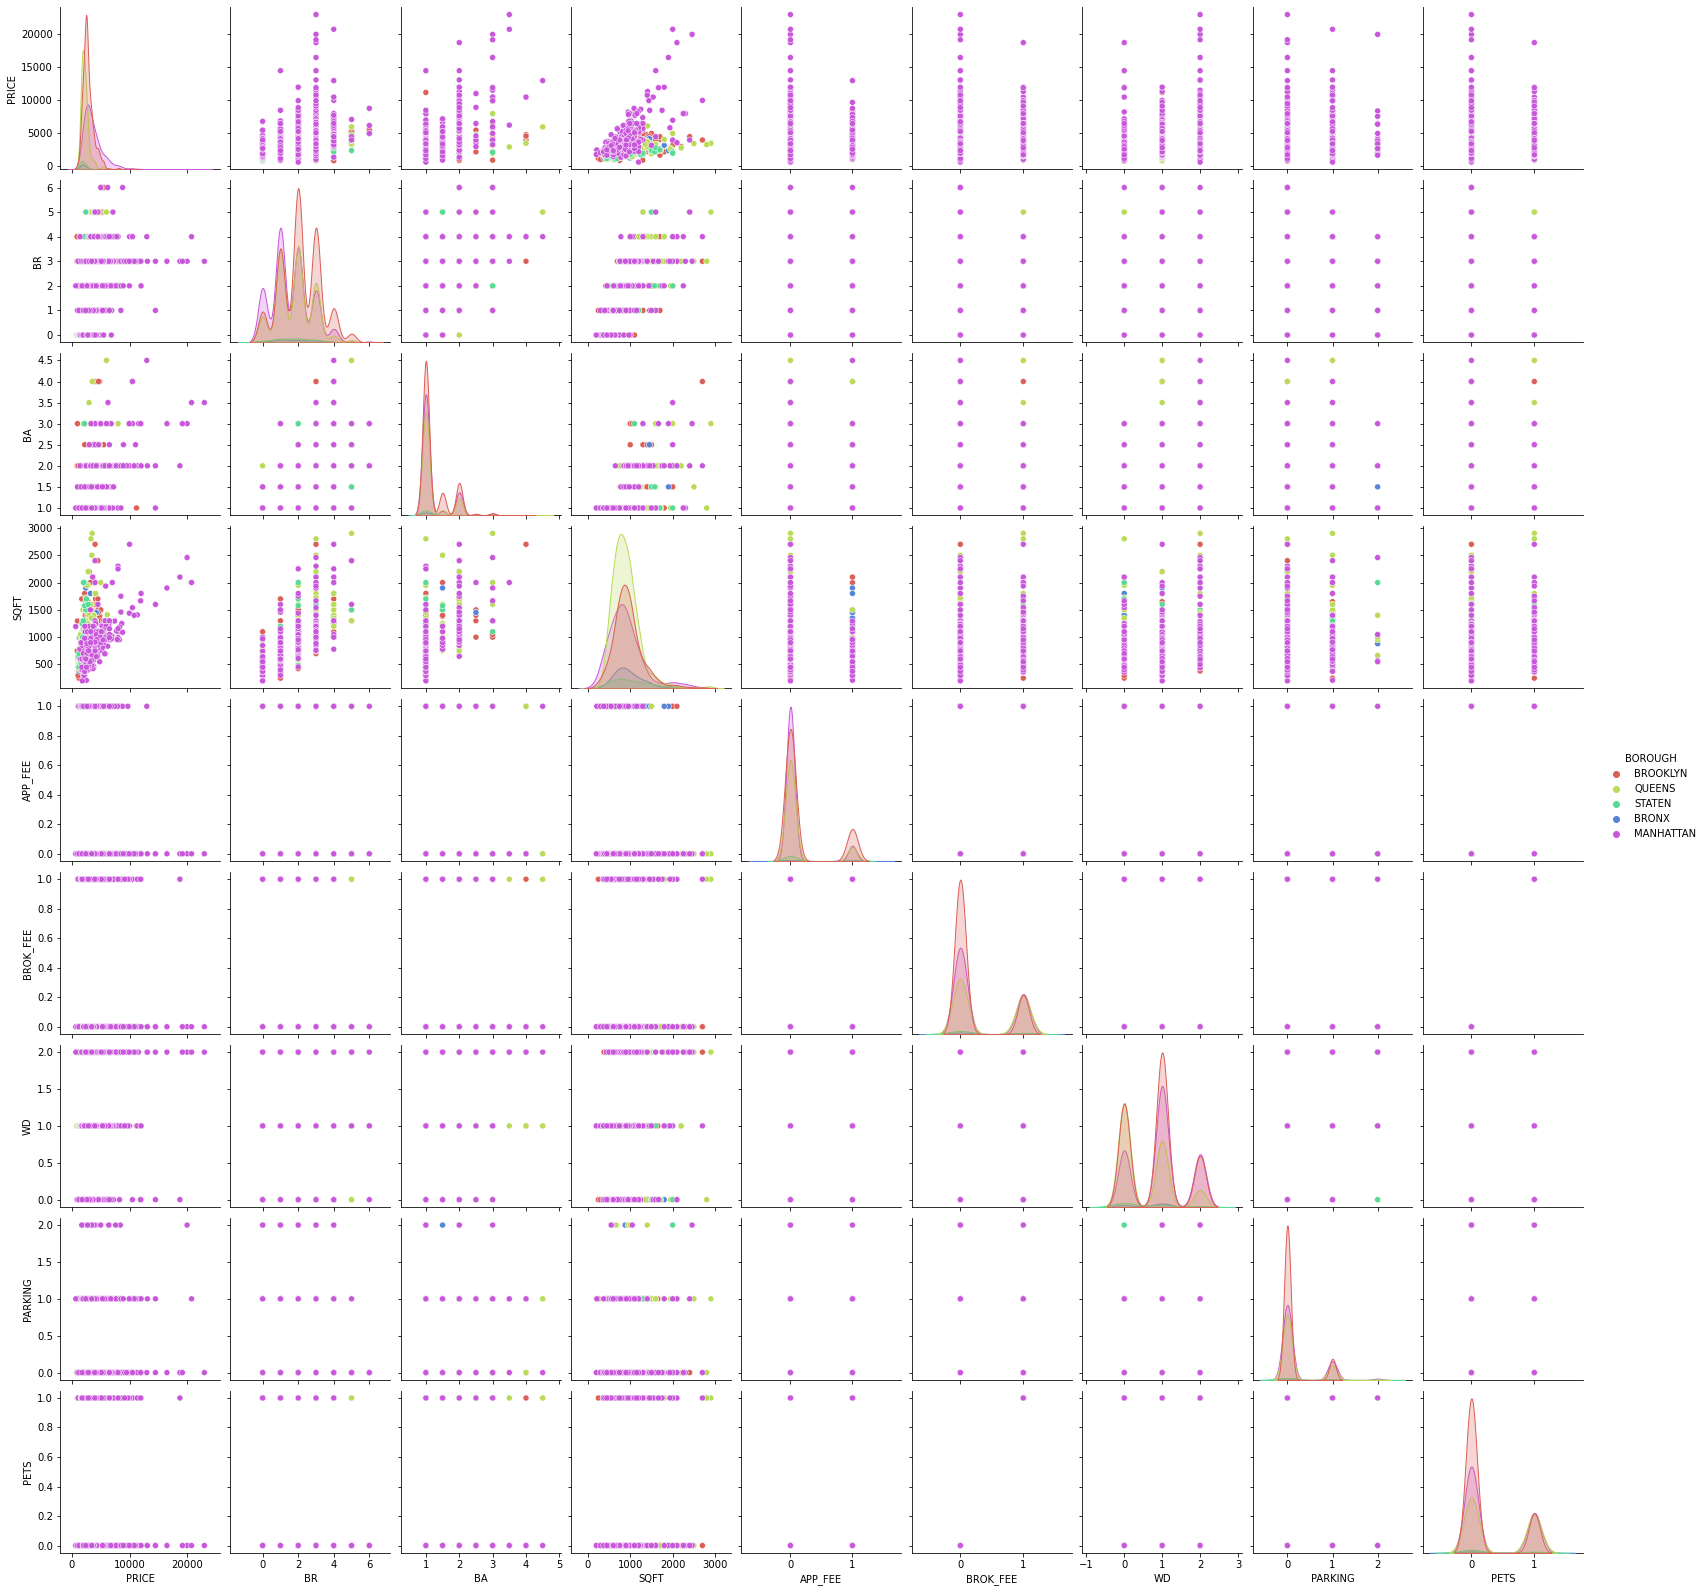

In [18]:
sns.pairplot(nyc, hue='BOROUGH', palette='hls', kind='scatter')

In [19]:
nyc_merged.corr()

,PRICE,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN
PRICE,1.000000,0.358431,0.493049,0.469367,-0.057764,-0.005242,0.353571,0.139475,-0.005242,-0.075958,0.369386,-0.263980,-0.096353
BR,0.358431,1.000000,0.477761,0.678813,-0.018736,-0.090043,0.056662,-0.010457,-0.090043,0.199585,-0.164866,-0.044470,-0.010950
BA,0.493049,0.477761,1.000000,0.571706,-0.008830,-0.004998,0.218916,0.091059,-0.004998,0.046937,-0.004923,-0.040672,-0.014550
SQFT,0.469367,0.678813,0.571706,1.000000,-0.088503,0.007436,0.133209,0.102040,0.007436,0.045142,-0.030449,-0.046495,0.054636
APP_FEE,-0.057764,-0.018736,-0.008830,-0.088503,1.000000,0.194077,-0.022707,-0.032344,0.194077,0.116504,-0.105145,-0.036247,-0.020694
BROK_FEE,-0.005242,-0.090043,-0.004998,0.007436,0.194077,1.000000,-0.142829,-0.118936,1.000000,-0.161742,0.030839,0.144508,-0.001454
WD,0.353571,0.056662,0.218916,0.133209,-0.022707,-0.142829,1.000000,0.205474,-0.142829,0.038332,0.179208,-0.215230,-0.044846
PARKING,0.139475,-0.010457,0.091059,0.102040,-0.032344,-0.118936,0.205474,1.000000,-0.118936,-0.117192,0.079283,0.030232,0.046812
PETS,-0.005242,-0.090043,-0.004998,0.007436,0.194077,1.000000,-0.142829,-0.118936,1.000000,-0.161742,0.030839,0.144508,-0.001454
BOROUGH_BROOKLYN,-0.075958,0.199585,0.046937,0.045142,0.116504,-0.161742,0.038332,-0.117192,-0.161742,1.000000,-0.552470,-0.477753,-0.112557


Text(0.5, 1.0, 'Correlation Heatmap')

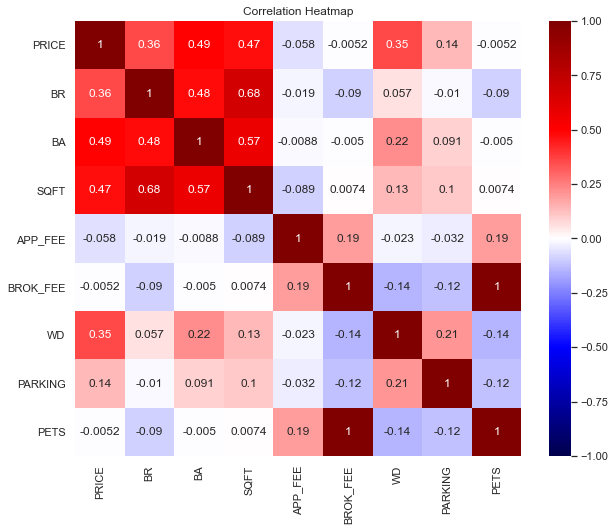

In [20]:
sns.set_theme(style='dark')
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(nyc.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

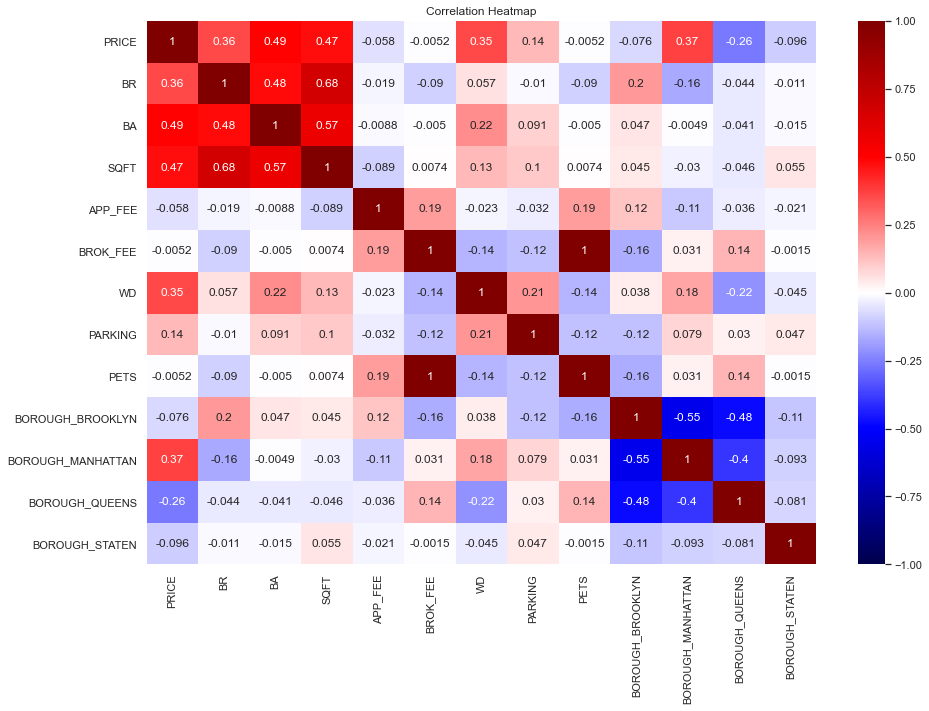

In [21]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(nyc_merged.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap')

Text(0.5, 1.0, 'Price vs. Square Footage of NYC Apts')

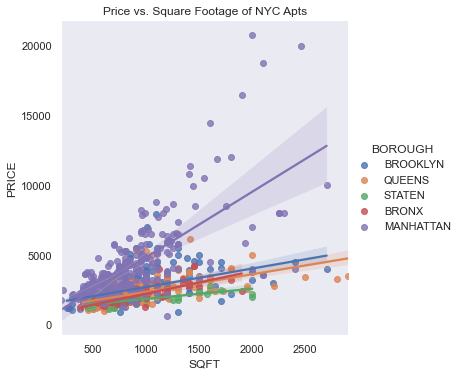

In [22]:
sns.lmplot(x='SQFT', y='PRICE', data=nyc_merged, hue='BOROUGH')
ax = plt.gca()
ax.set_title('Price vs. Square Footage of NYC Apts')

Text(0.5, 1.0, 'Price vs. Bedrooms')

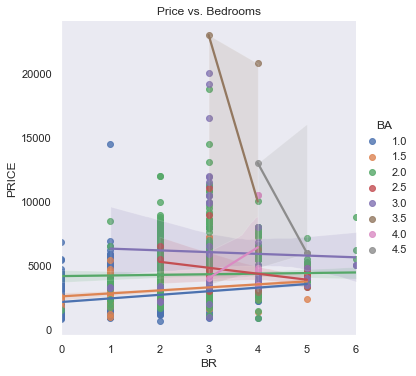

In [23]:
sns.lmplot(x='BR', y='PRICE', data=nyc_merged, hue='BA')
ax = plt.gca()
ax.set_title('Price vs. Bedrooms')

Text(0.5, 1.0, 'Price vs. Bathrooms')

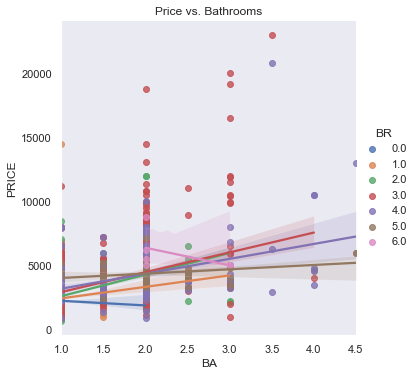

In [24]:
sns.lmplot(x='BA', y='PRICE', data=nyc_merged, hue='BR')
ax = plt.gca()
ax.set_title('Price vs. Bathrooms')

Text(0.5, 1.0, 'Frequency of # of Bedrooms')

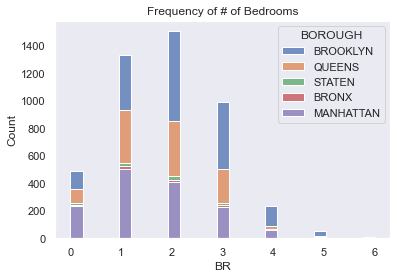

In [25]:
sns.histplot(x='BR', data=nyc_merged, hue='BOROUGH', multiple='stack')
ax = plt.gca()
ax.set_title('Frequency of # of Bedrooms')

Text(0.5, 1.0, 'Frequency of # of Bedrooms')

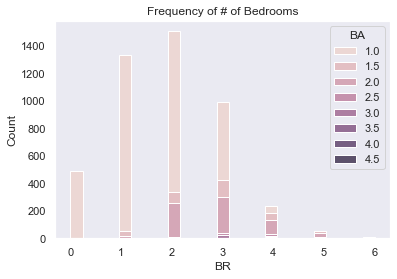

In [26]:
sns.histplot(x='BR', data=nyc_merged, hue='BA', multiple='stack')
ax = plt.gca()
ax.set_title('Frequency of # of Bedrooms')

Text(0.5, 1.0, 'Frequency of Apt by # of Bathrooms')

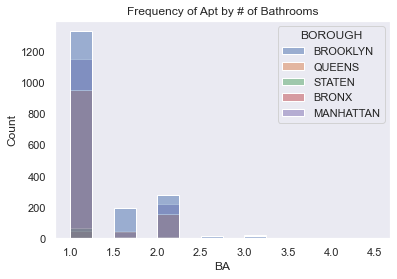

In [27]:
sns.histplot(x='BA', data=nyc_merged, hue='BOROUGH')
ax = plt.gca()
ax.set_title('Frequency of Apt by # of Bathrooms')

<AxesSubplot:xlabel='PARKING', ylabel='Count'>

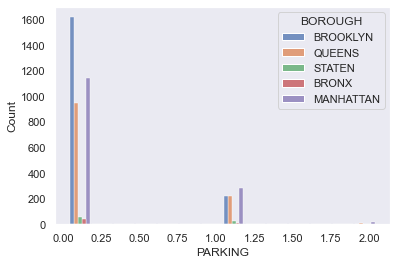

In [28]:
sns.histplot(x='PARKING', data=nyc, hue='BOROUGH', multiple='dodge', shrink=0.9)

<AxesSubplot:xlabel='WD', ylabel='Count'>

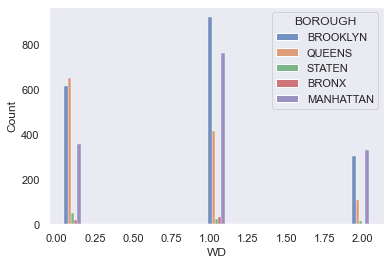

In [29]:
sns.histplot(x='WD', data=nyc, hue='BOROUGH', multiple='dodge', shrink = 0.9)

<AxesSubplot:xlabel='SQFT', ylabel='Count'>

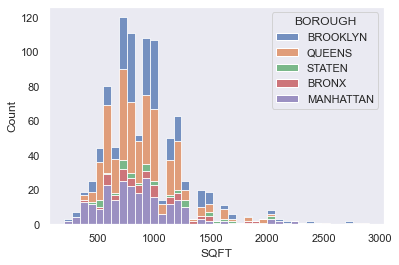

In [30]:
sns.histplot(x='SQFT', data=nyc, hue='BOROUGH', multiple='stack')

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

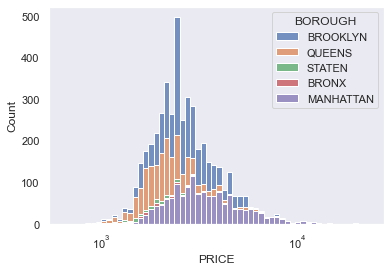

In [31]:
sns.histplot(x='PRICE', data=nyc, hue='BOROUGH', multiple='stack', log_scale=True)

# PREPROCESSING

In [32]:
#split into training and testing sets
from sklearn.model_selection import train_test_split

X = nyc_merged.drop(columns='PRICE')
y = nyc_merged.PRICE

#partition data into train/test data
X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 10)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 4118 to 1289
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BOROUGH            3687 non-null   object 
 1   BR                 3687 non-null   float64
 2   BA                 3687 non-null   float64
 3   SQFT               764 non-null    float64
 4   APP_FEE            3687 non-null   int64  
 5   BROK_FEE           3687 non-null   int64  
 6   WD                 3687 non-null   int64  
 7   PARKING            3687 non-null   int64  
 8   PETS               3687 non-null   int64  
 9   BOROUGH_BROOKLYN   3687 non-null   uint8  
 10  BOROUGH_MANHATTAN  3687 non-null   uint8  
 11  BOROUGH_QUEENS     3687 non-null   uint8  
 12  BOROUGH_STATEN     3687 non-null   uint8  
dtypes: float64(3), int64(5), object(1), uint8(4)
memory usage: 302.4+ KB


In [33]:
#fill in missing SQFT values with the median

##first create dictionaries for each borough showing the median sq footage grouped by # of bedrooms
brk = (X.loc[X['BOROUGH'] == 'BROOKLYN']).groupby(['BR']).SQFT.median()
brk_dict = brk.to_dict()

mnh = (X.loc[X['BOROUGH'] == 'MANHATTAN']).groupby(['BR']).SQFT.median()
mnh_dict = mnh.to_dict()

que = (X.loc[X['BOROUGH'] == 'QUEENS']).groupby(['BR']).SQFT.median()
que_dict = que.to_dict()

brx = (X.loc[X['BOROUGH'] == 'BRONX']).groupby(['BR']).SQFT.median()
brx_dict = brx.to_dict()

stn = (X.loc[X['BOROUGH'] == 'STATEN']).groupby(['BR']).SQFT.median()
stn_dict = stn.to_dict()

In [34]:
brk_missing = X.loc[(X['BOROUGH']=='BROOKLYN') & X.SQFT.isna()]
mnh_missing = X.loc[(X['BOROUGH']=='MANHATTAN') & X.SQFT.isna()]
que_missing = X.loc[(X['BOROUGH']=='QUEENS') & X.SQFT.isna()]
brx_missing = X.loc[(X['BOROUGH']=='BRONX') & X.SQFT.isna()]
stn_missing = X.loc[(X['BOROUGH']=='STATEN') & X.SQFT.isna()]

In [35]:
##next transfer values from dictionaries to NA values
def sqft_filler(row, borough_dict):
    for k, v in borough_dict.items():
        if row['BR'] == k:
            return v

In [36]:
##applying the function
brk_missing['SQFT'] = brk_missing.apply(sqft_filler, borough_dict=brk_dict, axis=1)
mnh_missing['SQFT'] = mnh_missing.apply(sqft_filler, borough_dict=mnh_dict, axis=1)
que_missing['SQFT'] = que_missing.apply(sqft_filler, borough_dict=que_dict, axis=1)
brx_missing['SQFT'] = brx_missing.apply(sqft_filler, borough_dict=brx_dict, axis=1)
stn_missing['SQFT'] = stn_missing.apply(sqft_filler, borough_dict=stn_dict, axis=1)

<ipython-input-36-0b8996aaabf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brk_missing['SQFT'] = brk_missing.apply(sqft_filler, borough_dict=brk_dict, axis=1)
<ipython-input-36-0b8996aaabf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnh_missing['SQFT'] = mnh_missing.apply(sqft_filler, borough_dict=mnh_dict, axis=1)
<ipython-input-36-0b8996aaabf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [37]:
#putting it all together
all_missing = pd.concat([brk_missing, mnh_missing, que_missing, brx_missing, stn_missing])

In [38]:
#filling in NA values
X = X.fillna(all_missing)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 4118 to 1289
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BOROUGH            3687 non-null   object 
 1   BR                 3687 non-null   float64
 2   BA                 3687 non-null   float64
 3   SQFT               3679 non-null   float64
 4   APP_FEE            3687 non-null   int64  
 5   BROK_FEE           3687 non-null   int64  
 6   WD                 3687 non-null   int64  
 7   PARKING            3687 non-null   int64  
 8   PETS               3687 non-null   int64  
 9   BOROUGH_BROOKLYN   3687 non-null   uint8  
 10  BOROUGH_MANHATTAN  3687 non-null   uint8  
 11  BOROUGH_QUEENS     3687 non-null   uint8  
 12  BOROUGH_STATEN     3687 non-null   uint8  
dtypes: float64(3), int64(5), object(1), uint8(4)
memory usage: 431.5+ KB


In [40]:
#dropping remaining rows with NA sqft values from the target set
dropfromy = (X[X['SQFT'].isna()]).index.to_list()
y = y.drop(dropfromy)

In [41]:
#dropping the NA values and the borough column from the feature set
X = X[~X['SQFT'].isna()]
X = X.drop(columns=['BOROUGH'])

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 4118 to 1289
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BR                 3679 non-null   float64
 1   BA                 3679 non-null   float64
 2   SQFT               3679 non-null   float64
 3   APP_FEE            3679 non-null   int64  
 4   BROK_FEE           3679 non-null   int64  
 5   WD                 3679 non-null   int64  
 6   PARKING            3679 non-null   int64  
 7   PETS               3679 non-null   int64  
 8   BOROUGH_BROOKLYN   3679 non-null   uint8  
 9   BOROUGH_MANHATTAN  3679 non-null   uint8  
 10  BOROUGH_QUEENS     3679 non-null   uint8  
 11  BOROUGH_STATEN     3679 non-null   uint8  
dtypes: float64(3), int64(5), uint8(4)
memory usage: 273.1 KB


# ----------------- FEATURE ENGINEERING FOR TEST DATA   ----------------- 

In [43]:
#doing the feature engineering again for the test data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 1327 to 2242
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BOROUGH            922 non-null    object 
 1   BR                 922 non-null    float64
 2   BA                 922 non-null    float64
 3   SQFT               205 non-null    float64
 4   APP_FEE            922 non-null    int64  
 5   BROK_FEE           922 non-null    int64  
 6   WD                 922 non-null    int64  
 7   PARKING            922 non-null    int64  
 8   PETS               922 non-null    int64  
 9   BOROUGH_BROOKLYN   922 non-null    uint8  
 10  BOROUGH_MANHATTAN  922 non-null    uint8  
 11  BOROUGH_QUEENS     922 non-null    uint8  
 12  BOROUGH_STATEN     922 non-null    uint8  
dtypes: float64(3), int64(5), object(1), uint8(4)
memory usage: 75.6+ KB


In [44]:
#creating dictionaries of median sqft values
tbrk = (X_test.loc[X_test['BOROUGH'] == 'BROOKLYN']).groupby(['BR']).SQFT.median()
tbrk_dict = tbrk.to_dict()

tmnh = (X_test.loc[X_test['BOROUGH'] == 'MANHATTAN']).groupby(['BR']).SQFT.median()
tmnh_dict = tmnh.to_dict()

tque = (X_test.loc[X_test['BOROUGH'] == 'QUEENS']).groupby(['BR']).SQFT.median()
tque_dict = tque.to_dict()

tbrx = (X_test.loc[X_test['BOROUGH'] == 'BRONX']).groupby(['BR']).SQFT.median()
tbrx_dict = tbrx.to_dict()

tstn = (X_test.loc[X_test['BOROUGH'] == 'STATEN']).groupby(['BR']).SQFT.median()
tstn_dict = tstn.to_dict()

#creating dataframes of missing sqft values
tbrk_missing = X_test.loc[(X_test['BOROUGH']=='BROOKLYN') & X_test.SQFT.isna()]
tmnh_missing = X_test.loc[(X_test['BOROUGH']=='MANHATTAN') & X_test.SQFT.isna()]
tque_missing = X_test.loc[(X_test['BOROUGH']=='QUEENS') & X_test.SQFT.isna()]
tbrx_missing = X_test.loc[(X_test['BOROUGH']=='BRONX') & X_test.SQFT.isna()]
tstn_missing = X_test.loc[(X_test['BOROUGH']=='STATEN') & X_test.SQFT.isna()]

#filling in missing sqft values based on median
tbrk_missing['SQFT'] = tbrk_missing.apply(sqft_filler, borough_dict=tbrk_dict, axis=1)
tmnh_missing['SQFT'] = tmnh_missing.apply(sqft_filler, borough_dict=tmnh_dict, axis=1)
tque_missing['SQFT'] = tque_missing.apply(sqft_filler, borough_dict=tque_dict, axis=1)
tbrx_missing['SQFT'] = tbrx_missing.apply(sqft_filler, borough_dict=tbrx_dict, axis=1)
tstn_missing['SQFT'] = tstn_missing.apply(sqft_filler, borough_dict=tstn_dict, axis=1)

#filling in missing sqft values
tall_missing = pd.concat([tbrk_missing, tmnh_missing, tque_missing, tbrx_missing, tstn_missing])
X_test = X_test.fillna(tall_missing)

<ipython-input-44-12c58cd67c12>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbrk_missing['SQFT'] = tbrk_missing.apply(sqft_filler, borough_dict=tbrk_dict, axis=1)
<ipython-input-44-12c58cd67c12>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmnh_missing['SQFT'] = tmnh_missing.apply(sqft_filler, borough_dict=tmnh_dict, axis=1)
<ipython-input-44-12c58cd67c12>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 1327 to 2242
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BOROUGH            922 non-null    object 
 1   BR                 922 non-null    float64
 2   BA                 922 non-null    float64
 3   SQFT               911 non-null    float64
 4   APP_FEE            922 non-null    int64  
 5   BROK_FEE           922 non-null    int64  
 6   WD                 922 non-null    int64  
 7   PARKING            922 non-null    int64  
 8   PETS               922 non-null    int64  
 9   BOROUGH_BROOKLYN   922 non-null    uint8  
 10  BOROUGH_MANHATTAN  922 non-null    uint8  
 11  BOROUGH_QUEENS     922 non-null    uint8  
 12  BOROUGH_STATEN     922 non-null    uint8  
dtypes: float64(3), int64(5), object(1), uint8(4)
memory usage: 107.9+ KB


In [46]:
#dropping missing values from y test set
tdropfromy = (X_test[X_test['SQFT'].isna()]).index.to_list()
y_test = y_test.drop(tdropfromy)

In [47]:
#dropping borough and NA values
X_test = X_test[~X_test['SQFT'].isna()]
X_test = X_test.drop(columns=['BOROUGH'])

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 1327 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BR                 911 non-null    float64
 1   BA                 911 non-null    float64
 2   SQFT               911 non-null    float64
 3   APP_FEE            911 non-null    int64  
 4   BROK_FEE           911 non-null    int64  
 5   WD                 911 non-null    int64  
 6   PARKING            911 non-null    int64  
 7   PETS               911 non-null    int64  
 8   BOROUGH_BROOKLYN   911 non-null    uint8  
 9   BOROUGH_MANHATTAN  911 non-null    uint8  
 10  BOROUGH_QUEENS     911 non-null    uint8  
 11  BOROUGH_STATEN     911 non-null    uint8  
dtypes: float64(3), int64(5), uint8(4)
memory usage: 67.6 KB


# -------------- END FEATURE ENGINEERING FOR TEST DATA ------------------

In [49]:
#trying out OLS Regression
#adding a constant to X
Xc = sm.add_constant(X)

OLSmodel = sm.OLS(y, Xc)

#Fit the model
OLSfit = OLSmodel.fit()

#print statistics of the fitted model
print(OLSfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     313.3
Date:                Sun, 27 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:11:42   Log-Likelihood:                -30875.
No. Observations:                3679   AIC:                         6.177e+04
Df Residuals:                    3667   BIC:                         6.185e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -707.6764    181.83

In [50]:
#look for influential points
influence = OLSfit.get_influence()
influence_frame = influence.summary_frame().reset_index()

influence_frame[influence_frame['cooks_d'] > 0.5]

,index,dfb_const,dfb_BR,dfb_BA,dfb_SQFT,dfb_APP_FEE,dfb_BROK_FEE,dfb_WD,dfb_PARKING,dfb_PETS,dfb_BOROUGH_BROOKLYN,dfb_BOROUGH_MANHATTAN,dfb_BOROUGH_QUEENS,dfb_BOROUGH_STATEN,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits


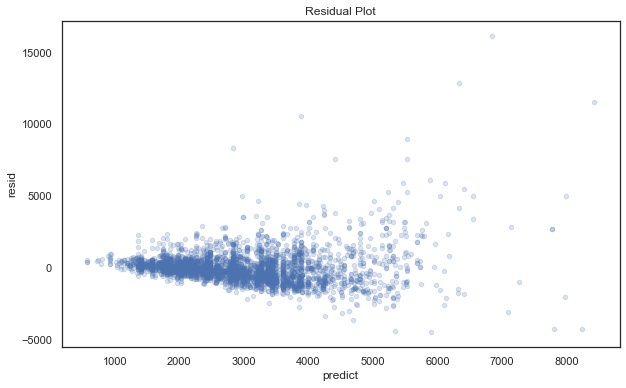

In [51]:
#plotting residuals
X['predict'] = OLSfit.predict(Xc)
X['resid'] = y - X['predict']
with sns.axes_style('white'):
    plot=X.plot(kind='scatter',
                  x='predict',y='resid', alpha=0.2, color='b', figsize=(10,6), title='Residual Plot')

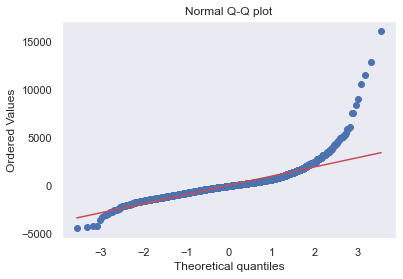

In [52]:
stats.probplot(X['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [53]:
X = X.drop(columns=['predict','resid'])

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#ignore intercept VIF
#drop a variable or combine features, run again and and see how VIF is affected

vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

/Users/ami/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,BR,14.876192
1,BA,11.761910
2,SQFT,44.852773
3,APP_FEE,1.236165
4,BROK_FEE,inf
5,WD,2.697786
6,PARKING,1.302989
7,PETS,inf
8,BOROUGH_BROOKLYN,7.909477
9,BOROUGH_MANHATTAN,6.315810


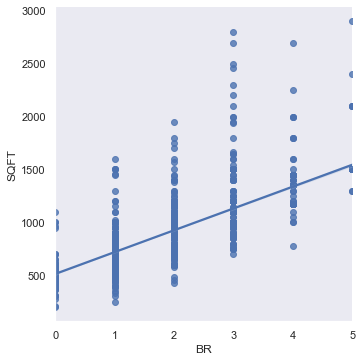

In [55]:
#might have to deal with multicollinearity
sns.lmplot(x="BR", y="SQFT", data=X)

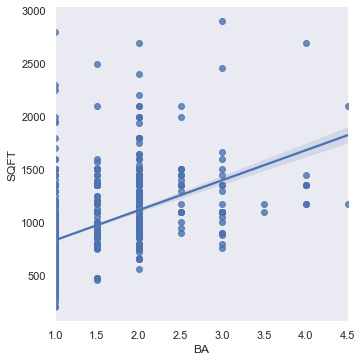

In [56]:
sns.lmplot(x="BA", y="SQFT", data=X)

# X: Getting an initial read on things

In [57]:
#normalize the data
from sklearn.preprocessing import StandardScaler
## .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X)

##apply the scaler to the train set
X_tr_scaled = std.transform(X)

In [58]:
#CROSS VALIDATION TIME!!!!!
y = np.array(y)

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score

In [59]:
linreg = LinearRegression()

linreg_score_r2 = cross_val_score(linreg, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [60]:
np.mean(linreg_score_r2)

0.47427043806624525

In [61]:
np.mean(linreg_score_MAE)

-673.7696826157203

In [62]:
np.mean(linreg_score_RMSE)

-1070.9670298828182

In [63]:
#trying ridge regression
alphas = 10**np.linspace(-2, 2, 200)

ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X_tr_scaled, y)

ridge_model.alpha_

4.937047852839004

In [64]:
ridge_model = Ridge(alpha = 4.7)

ridge_score_r2 = cross_val_score(ridge_model, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

ridge_score_MAE = cross_val_score(ridge_model, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error') # scoring metric

ridge_score_RMSE = cross_val_score(ridge_model, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error') # scoring metric

In [65]:
np.mean(ridge_score_r2)

0.47428470885667906

In [66]:
np.mean(ridge_score_MAE)

-673.8027494272941

In [67]:
np.mean(ridge_score_RMSE)

-1070.9710294265212

In [68]:
#lasso regression

#finding the best alpha
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr_scaled, y)

lasso_model.alpha_

0.01

In [69]:
lasso_model = Lasso(alpha = 0.01)

lasso_score_r2 = cross_val_score(lasso_model, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

lasso_score_MAE = cross_val_score(lasso_model, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error') # scoring metric

lasso_score_RMSE = cross_val_score(lasso_model, X_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error') # scoring metric

In [70]:
np.mean(lasso_score_r2)

0.47426634896928377

In [71]:
np.mean(lasso_score_MAE)

-673.9707820809508

In [72]:
np.mean(lasso_score_RMSE)

-1070.9713912990196

In [73]:
#trying polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [74]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_tr_scaled)


# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y)
lr_poly.score(X_train_poly,y)

0.6050313421700446

# X2: Dropping application fee

In [75]:
#dropping some features might help
X2 = X.drop(columns=['APP_FEE'])

In [76]:
#scaling again
std.fit(X2)
X2_tr_scaled = std.transform(X2)

In [77]:
linreg_score_r2 = cross_val_score(linreg, X2_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X2_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X2_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [78]:
np.mean(linreg_score_r2)

0.47448379275153096

In [79]:
np.mean(linreg_score_MAE)

-673.2268958085102

In [80]:
np.mean(linreg_score_RMSE)

-1070.6984786231935

In [81]:
#trying polynomial regression again too
poly = PolynomialFeatures(degree=2)
X2_train_poly = poly.fit_transform(X2_tr_scaled)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X2_train_poly,y)
lr_poly.score(X2_train_poly,y)

0.6027465166254776

In [82]:
#cross val score for polynomial regression?
polyreg_score_r2 = cross_val_score(lr_poly, X2_train_poly, y, # estimator, features, target
                cv=3, # number of folds 
                scoring='r2') # scoring metric

In [83]:
polyreg_score_r2

array([0.59256407, 0.55419107, 0.58112494])

In [84]:
#trying ridge again
alphas = 10**np.linspace(-2, 2, 200)

ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X2_tr_scaled, y)

ridge_model.alpha_

4.937047852839004

In [85]:
ridge_model = Ridge(alpha = 4.9)

ridge_score_r2 = cross_val_score(ridge_model, X2_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

ridge_score_MAE = cross_val_score(ridge_model, X2_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error') # scoring metric

ridge_score_RMSE = cross_val_score(ridge_model, X2_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error') # scoring metric

In [86]:
np.mean(ridge_score_r2)

0.47454608746713367

In [87]:
np.mean(ridge_score_MAE)

-672.9357668940609

In [88]:
np.mean(ridge_score_RMSE)

-1070.6553113719465

In [89]:
#trying out OLS Regression
#adding a constant to X
X2c = sm.add_constant(X2)

OLSmodel = sm.OLS(y, X2c)

#Fit the model
OLSfit = OLSmodel.fit()

#print statistics of the fitted model
print(OLSfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     344.3
Date:                Sun, 27 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:14:07   Log-Likelihood:                -30876.
No. Observations:                3679   AIC:                         6.177e+04
Df Residuals:                    3668   BIC:                         6.184e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -738.0402    180.49

In [90]:
#what about the VIF score?
vif = pd.DataFrame()
vif['variables'] = X2.columns
vif['vif'] =[variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif

/Users/ami/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,BR,14.856011
1,BA,11.759105
2,SQFT,44.827895
3,BROK_FEE,inf
4,WD,2.697142
5,PARKING,1.302398
6,PETS,inf
7,BOROUGH_BROOKLYN,7.855778
8,BOROUGH_MANHATTAN,6.315415
9,BOROUGH_QUEENS,4.929074


# X3: DROPPING APP FEE AND PETS

In [91]:
#no big difference--what if we dropped pets too?
X3 = X.drop(columns=['APP_FEE','PETS'])

In [92]:
#scaling again
std.fit(X3)
X3_tr_scaled = std.transform(X3)

In [93]:
linreg_score_r2 = cross_val_score(linreg, X3_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X3_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X3_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [94]:
np.mean(linreg_score_r2)

0.47452571670652094

In [95]:
np.mean(linreg_score_MAE)

-673.1430542322275

In [96]:
np.mean(linreg_score_RMSE)

-1070.6586766693583

In [97]:
#trying polynomial regression again too
poly = PolynomialFeatures(degree=2)
X3_train_poly = poly.fit_transform(X3_tr_scaled)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X3_train_poly,y)
lr_poly.score(X3_train_poly,y)

0.6018424111537504

In [90]:
# not better, should probably keep pets

# X4: COMBINING FEATURES

In [98]:
#again no big differences
#now will try to represent BA & BR as a single term and drop BA & BR to reduce multicollinearity

#first going to change 0BR apts (studios) to 0.5
X.loc[X['BR'] == 0, 'BR'] = 0.5

#creating new interaction term
X['BA-BR'] = X['BA'] * X['BR']
X.head()

,BR,BA,SQFT,APP_FEE,BROK_FEE,WD,PARKING,PETS,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN,BA-BR
4118,1.0,1.0,761.0,0,0,1,0,0,0,1,0,0,1.0
2087,2.0,1.0,880.0,0,0,1,0,0,0,0,1,0,2.0
4220,0.5,1.0,453.0,0,1,1,0,1,0,1,0,0,0.5
2886,2.0,1.0,880.0,1,1,0,1,1,0,0,1,0,2.0
476,2.0,1.0,850.0,0,1,2,0,1,1,0,0,0,2.0


In [99]:
X4 = X.drop(columns=['BA','BR','APP_FEE'])

In [100]:
#scaling again
std = StandardScaler()
std.fit(X4)

##apply the scaler to the train set
X4_tr_scaled = std.transform(X4)

In [101]:
linreg_score_r2 = cross_val_score(linreg, X4_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X4_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X4_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [102]:
np.mean(linreg_score_r2)

0.4552412678378787

In [103]:
np.mean(linreg_score_MAE)

-675.8740687403492

In [104]:
np.mean(linreg_score_RMSE)

-1091.393629344118

In [105]:
#trying polynomial regression 
poly = PolynomialFeatures(degree=2)
X4_train_poly = poly.fit_transform(X4_tr_scaled)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X4_train_poly,y)
lr_poly.score(X4_train_poly,y)

0.5543224450161969

In [106]:
#results are even worse, but how about VIF?
vif = pd.DataFrame()
vif['variables'] = X4.columns
vif['vif'] =[variance_inflation_factor(X4_tr_scaled, i) for i in range(X4.shape[1])]
vif

/Users/ami/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,SQFT,2.342818
1,BROK_FEE,inf
2,WD,1.152151
3,PARKING,1.080451
4,PETS,inf
5,BOROUGH_BROOKLYN,19.789453
6,BOROUGH_MANHATTAN,17.988786
7,BOROUGH_QUEENS,16.050532
8,BOROUGH_STATEN,2.440379
9,BA-BR,2.334741


# X5 Dropping SQFT

In [107]:
#not too bad when data is scaled-- what if we dropped sqft
X5 = X.drop(columns=['BR','BA','APP_FEE','SQFT'])

In [108]:
#scaling again
std = StandardScaler()
std.fit(X5)

##apply the scaler to the train set
X5_tr_scaled = std.transform(X5)

In [109]:
linreg_score_r2 = cross_val_score(linreg, X5_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X5_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X5_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [110]:
np.mean(linreg_score_r2)

0.44291152371581866

In [111]:
np.mean(linreg_score_MAE)

-682.3234332871237

In [112]:
np.mean(linreg_score_RMSE)

-1102.985955765087

In [113]:
#trying polynomial regression even though it's probably going to be worse too
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X5_tr_scaled)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y)
lr_poly.score(X_train_poly, y)

0.5344496536248564

In [114]:
#model is doing worse, but how's the VIF now
vif = pd.DataFrame()
vif['variables'] = X5.columns
vif['vif'] =[variance_inflation_factor(X5_tr_scaled, i) for i in range(X5.shape[1])]
vif

/Users/ami/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,BROK_FEE,inf
1,WD,1.151049
2,PARKING,1.081282
3,PETS,inf
4,BOROUGH_BROOKLYN,19.873000
5,BOROUGH_MANHATTAN,17.953219
6,BOROUGH_QUEENS,16.017763
7,BOROUGH_STATEN,2.436433
8,BA-BR,1.052724


In [115]:
#VIF is better now, but at what cost?

# X6: Dropping BA/BR and keeping SQFT

In [116]:
X6 = X.drop(columns=['BA','BR','BA-BR','APP_FEE'])

In [117]:
#scaling again
std = StandardScaler()
std.fit(X6)

##apply the scaler to the train set
X6_tr_scaled = std.transform(X6)

In [118]:
linreg_score_r2 = cross_val_score(linreg, X6_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X6_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X6_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [119]:
np.mean(linreg_score_r2)

0.40958498130499593

In [120]:
np.mean(linreg_score_MAE)

-700.3609910806044

In [121]:
np.mean(linreg_score_RMSE)

-1138.0150547180965

In [122]:
#trying polynomial regression 
poly = PolynomialFeatures(degree=2)
X6_train_poly = poly.fit_transform(X6_tr_scaled)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X6_train_poly,y)
lr_poly.score(X6_train_poly,y)

0.469860789944443

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#ignore intercept VIF
#drop a variable or combine features, run again and and see how VIF is affected

vif = pd.DataFrame()
vif['variables'] = X6.columns
vif['vif'] =[variance_inflation_factor(X6_tr_scaled, i) for i in range(X6.shape[1])]
vif

/Users/ami/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,SQFT,1.057460
1,BROK_FEE,inf
2,WD,1.134287
3,PARKING,1.080032
4,PETS,inf
5,BOROUGH_BROOKLYN,19.869052
6,BOROUGH_MANHATTAN,18.000826
7,BOROUGH_QUEENS,16.034245
8,BOROUGH_STATEN,2.437937


# X7: Including BA/BR (plus BA and BR), only excluding APP FEE

In [124]:
X7 = X.drop(columns=['APP_FEE'])

In [125]:
#scaling again
std = StandardScaler()
std.fit(X7)

##apply the scaler to the train set
X7_tr_scaled = std.transform(X7)

In [126]:
vif = pd.DataFrame()
vif['variables'] = X7.columns
vif['vif'] =[variance_inflation_factor(X7_tr_scaled, i) for i in range(X7.shape[1])]
vif

/Users/ami/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,BR,12.342595
1,BA,9.954124
2,SQFT,3.851659
3,BROK_FEE,inf
4,WD,1.180297
5,PARKING,1.086563
6,PETS,inf
7,BOROUGH_BROOKLYN,19.945064
8,BOROUGH_MANHATTAN,18.022162
9,BOROUGH_QUEENS,16.090318


In [127]:
linreg_score_r2 = cross_val_score(linreg, X7_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X7_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X7_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [128]:
np.mean(linreg_score_r2)

0.475104403103377

In [129]:
np.mean(linreg_score_MAE)

-672.7602048001828

In [130]:
np.mean(linreg_score_RMSE)

-1069.7587922730422

In [131]:
#trying polynomial regression, this time with higher degree
poly = PolynomialFeatures(degree=4)
X7_train_poly = poly.fit_transform(X7_tr_scaled)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X7_train_poly,y)
lr_poly.score(X7_train_poly,y)

0.7438099472246681

# X8: Adding interaction term for Manhattan x SQFT? Trying a different interaction term for BR and BA? (dropping appfee, pets)

In [132]:
X['MNH-SQFT'] = X['SQFT'] * X['BOROUGH_MANHATTAN']

In [133]:
#trying a different interaction term for bedrooms and bathrooms
X['BR-BA'] = X['BR'] / X['BA']

In [134]:
X8 = X.drop(columns=['APP_FEE','PETS', 'BA-BR'])

In [135]:
X8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 4118 to 1289
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BR                 3679 non-null   float64
 1   BA                 3679 non-null   float64
 2   SQFT               3679 non-null   float64
 3   BROK_FEE           3679 non-null   int64  
 4   WD                 3679 non-null   int64  
 5   PARKING            3679 non-null   int64  
 6   BOROUGH_BROOKLYN   3679 non-null   uint8  
 7   BOROUGH_MANHATTAN  3679 non-null   uint8  
 8   BOROUGH_QUEENS     3679 non-null   uint8  
 9   BOROUGH_STATEN     3679 non-null   uint8  
 10  MNH-SQFT           3679 non-null   float64
 11  BR-BA              3679 non-null   float64
dtypes: float64(5), int64(3), uint8(4)
memory usage: 402.1 KB


In [136]:
#scaling again
std = StandardScaler()
std.fit(X8)

##apply the scaler to the train set
X8_tr_scaled = std.transform(X8)

In [137]:
linreg_score_r2 = cross_val_score(linreg, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

linreg_score_MAE = cross_val_score(linreg, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error')

linreg_score_RMSE = cross_val_score(linreg, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error')

In [138]:
np.mean(linreg_score_r2)

0.5148755558395743

In [139]:
np.mean(linreg_score_MAE)

-648.644879882239

In [140]:
np.mean(linreg_score_RMSE)

-1027.444880850991

In [141]:
#ridge regression--finding the alpha
alphas = 10**np.linspace(-2, 2, 200)

ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X8_tr_scaled, y)

ridge_model.alpha_

20.72921779595372

In [142]:
ridge_model = Ridge(alpha = 20.72921779595372)

ridge_score_r2 = cross_val_score(ridge_model, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

ridge_score_MAE = cross_val_score(ridge_model, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error') # scoring metric

ridge_score_RMSE = cross_val_score(ridge_model, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error') # scoring metric

In [143]:
print(np.mean(ridge_score_r2), np.mean(linreg_score_MAE), np.mean(linreg_score_RMSE))

0.5154521822550076 -648.644879882239 -1027.444880850991


In [144]:
#finding alpha for lasso
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X8_tr_scaled, y)

lasso_model.alpha_

0.015167168884709226

In [145]:
lasso_model = Lasso(alpha = 0.015167168884709226)

lasso_score_r2 = cross_val_score(lasso_model, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

lasso_score_MAE = cross_val_score(lasso_model, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_mean_absolute_error') # scoring metric

lasso_score_RMSE = cross_val_score(lasso_model, X8_tr_scaled, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='neg_root_mean_squared_error') # scoring metric

In [146]:
print(np.mean(lasso_score_r2), np.mean(lasso_score_MAE), np.mean(lasso_score_RMSE))

0.514878865825834 -648.6357509363945 -1027.4438187429173


In [147]:
#Curious about OLS
#adding a constant to X
X8c = sm.add_constant(X8)

OLSmodel = sm.OLS(y, X8c)

#Fit the model
OLSfit = OLSmodel.fit()

#print statistics of the fitted model
print(OLSfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     339.5
Date:                Sun, 27 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:17:24   Log-Likelihood:                -30719.
No. Observations:                3679   AIC:                         6.146e+04
Df Residuals:                    3666   BIC:                         6.155e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -517.3600    215.07

In [148]:
vif = pd.DataFrame()
vif['variables'] = X8.columns
vif['vif'] =[variance_inflation_factor(X8_tr_scaled, i) for i in range(X8.shape[1])]
vif

,variables,vif
0,BR,24.626210
1,BA,8.557337
2,SQFT,4.497295
3,BROK_FEE,1.078687
4,WD,1.184902
5,PARKING,1.087153
6,BOROUGH_BROOKLYN,19.939513
7,BOROUGH_MANHATTAN,29.935476
8,BOROUGH_QUEENS,16.101196
9,BOROUGH_STATEN,2.444164


# But is there overfitting? Applying the model to the test data

In [149]:
#applying same feature engineering to test data
X_test['MNH-SQFT'] = X_test['SQFT'] * X_test['BOROUGH_MANHATTAN']
X_test.loc[X_test['BR'] == 0, 'BR'] = 0.5
X_test['BR-BA'] = X_test['BR'] / X_test['BA']
X_test1 = X_test.drop(columns=['APP_FEE','PETS'])
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 1327 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BR                 911 non-null    float64
 1   BA                 911 non-null    float64
 2   SQFT               911 non-null    float64
 3   BROK_FEE           911 non-null    int64  
 4   WD                 911 non-null    int64  
 5   PARKING            911 non-null    int64  
 6   BOROUGH_BROOKLYN   911 non-null    uint8  
 7   BOROUGH_MANHATTAN  911 non-null    uint8  
 8   BOROUGH_QUEENS     911 non-null    uint8  
 9   BOROUGH_STATEN     911 non-null    uint8  
 10  MNH-SQFT           911 non-null    float64
 11  BR-BA              911 non-null    float64
dtypes: float64(5), int64(3), uint8(4)
memory usage: 67.6 KB


In [150]:
X8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 4118 to 1289
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BR                 3679 non-null   float64
 1   BA                 3679 non-null   float64
 2   SQFT               3679 non-null   float64
 3   BROK_FEE           3679 non-null   int64  
 4   WD                 3679 non-null   int64  
 5   PARKING            3679 non-null   int64  
 6   BOROUGH_BROOKLYN   3679 non-null   uint8  
 7   BOROUGH_MANHATTAN  3679 non-null   uint8  
 8   BOROUGH_QUEENS     3679 non-null   uint8  
 9   BOROUGH_STATEN     3679 non-null   uint8  
 10  MNH-SQFT           3679 non-null   float64
 11  BR-BA              3679 non-null   float64
dtypes: float64(5), int64(3), uint8(4)
memory usage: 402.1 KB


In [151]:
#scaling again
std = StandardScaler()
std.fit(X_test1)

##apply the scaler to the train set
X_te_scaled = std.transform(X_test1)

In [173]:
#testing out lasso model (X8)
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_model = Ridge(alpha = 20.72921779595372)
best_model.fit(X8_tr_scaled, y)

train_score = best_model.score(X8_tr_scaled, y)
test_score = best_model.score(X_te_scaled, y_test)

predictions = best_model.predict(X_te_scaled)

test_MAE = mean_absolute_error(predictions, y_test)

test_RMSE = np.sqrt(mean_squared_error(predictions, y_test))

In [174]:
print(train_score, test_score, test_MAE, test_RMSE)

0.5260797844653575 0.5193950313298956 671.1474537800773 1127.7206839086844


In [154]:
#testing out polynomial regression
poly = PolynomialFeatures(degree=4)
X8_train_poly = poly.fit_transform(X8_tr_scaled)
#need to transform the test data I guess
X_test_poly = poly.fit_transform(X_te_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X8_train_poly, y)
poly_train_score = lr_poly.score(X8_train_poly,y)
poly_test_score = lr_poly.score(X_test_poly, y_test)

In [155]:
print(poly_train_score, poly_test_score)

0.7567716684655876 -1.6222528433615405e+20


# Visualizations

<AxesSubplot:xlabel='PARKING', ylabel='Count'>

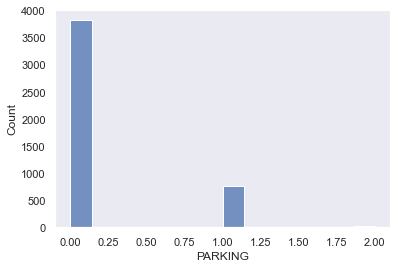

In [156]:
sns.histplot(x='PARKING', data=nyc)

Text(0.5, 1.0, 'Price vs. BA*BR interaction term')

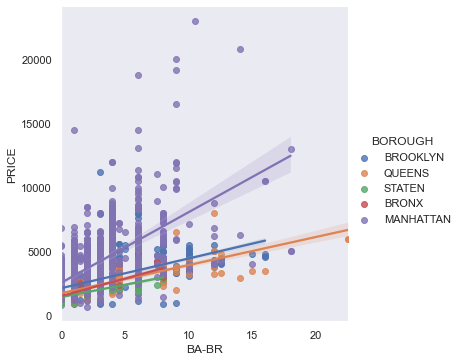

In [157]:
nyc_merged['BA-BR'] = nyc_merged['BA'] * nyc_merged['BR']
sns.lmplot(x='BA-BR', y='PRICE', data=nyc_merged, hue='BOROUGH')
ax.set_title('Price vs. BA*BR interaction term')

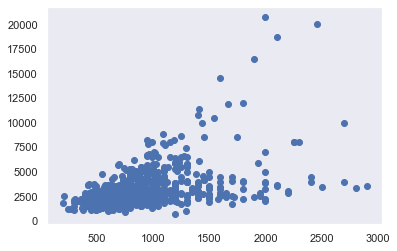

In [158]:
ax = plt.gca()
ax.scatter(nyc_merged['SQFT'], nyc_merged['PRICE'])

<AxesSubplot:title={'center':'# of Listings per Borough'}, xlabel='BOROUGH', ylabel='count'>

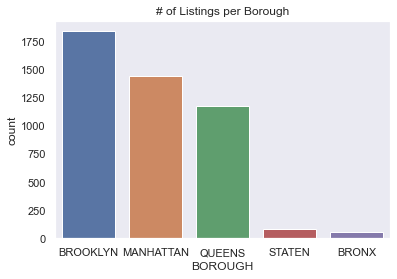

In [159]:
ax = plt.gca()
ax.set_title('# of Listings per Borough')
sns.countplot(x='BOROUGH', data=nyc, order=['BROOKLYN','MANHATTAN','QUEENS','STATEN','BRONX'])

<AxesSubplot:title={'center':'Types of Parking by Borough'}, xlabel='PARKING', ylabel='count'>

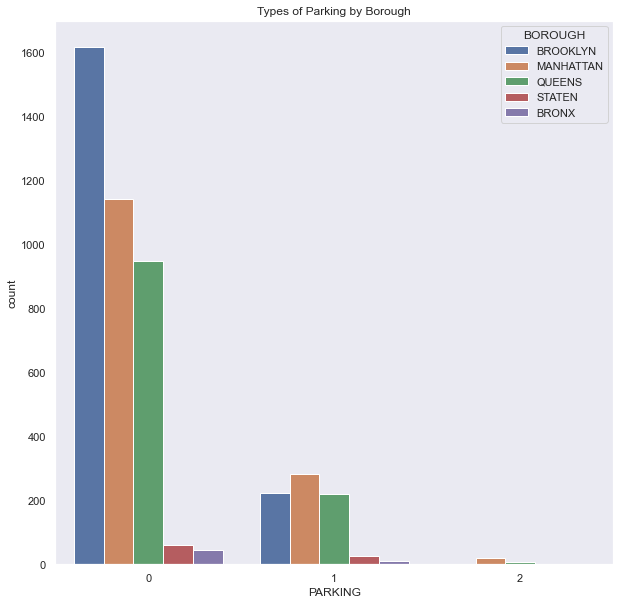

In [160]:
ax = plt.figure(figsize = (10,10))
plt.title('Types of Parking by Borough')
sns.countplot(x='PARKING', data=nyc, hue='BOROUGH', hue_order=['BROOKLYN','MANHATTAN','QUEENS','STATEN','BRONX'])

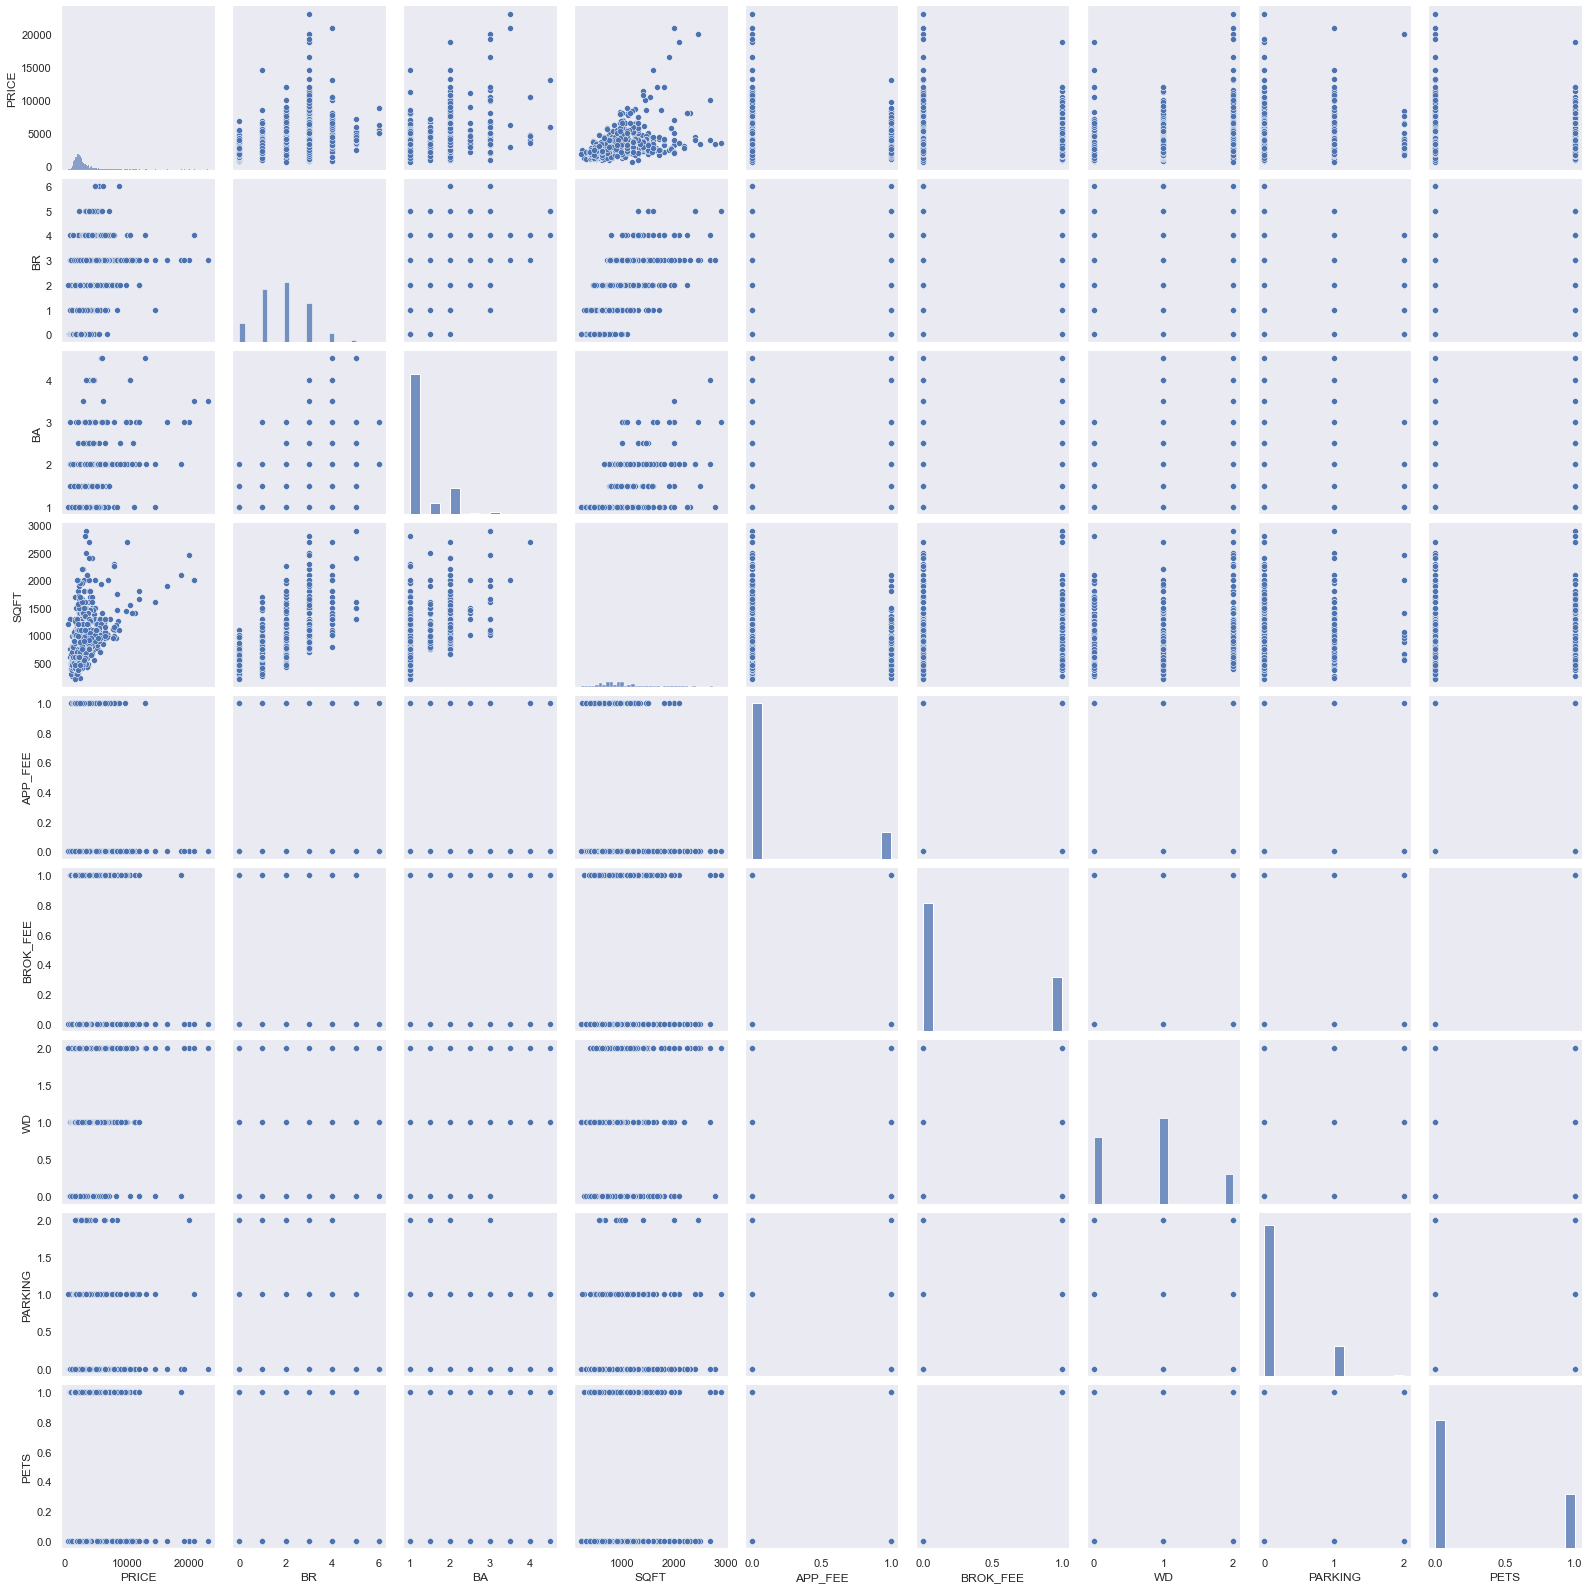

In [161]:
sns.pairplot(nyc)

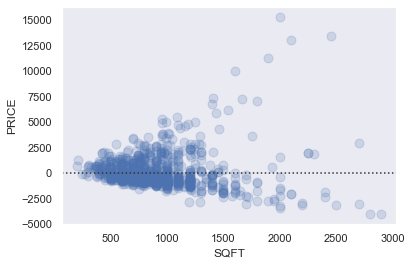

In [162]:
sns.residplot(x="SQFT", y="PRICE", data=nyc,
              scatter_kws={"s": 80, 'alpha' : 0.2});

Text(0.5, 1.0, 'Monthly Apartment Rental Price by Borough')

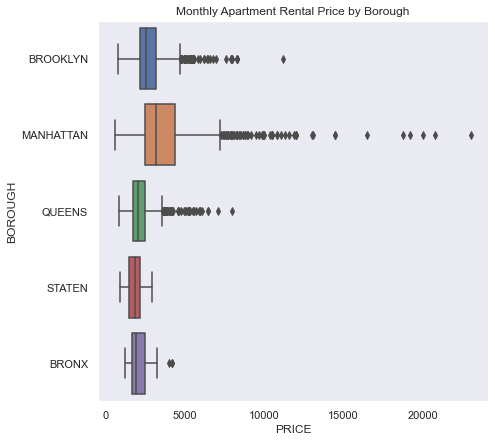

In [176]:
ax = plt.figure(figsize = (7,7))
ax = sns.boxplot(x="PRICE", y="BOROUGH", data=nyc, order=['BROOKLYN','MANHATTAN','QUEENS','STATEN','BRONX'])
ax.set_title('Monthly Apartment Rental Price by Borough')

In [164]:
coefficients = pd.DataFrame()
coefficients['features'] = X8.columns
coefficients['coefficient_value'] =[(best_model.coef_[i]) for i in range(X8.shape[1])]
coefficients

,features,coefficient_value
0,BR,-175.245417
1,BA,636.918474
2,SQFT,94.859944
3,BROK_FEE,68.208975
4,WD,256.796328
5,PARKING,90.485528
6,BOROUGH_BROOKLYN,228.094029
7,BOROUGH_MANHATTAN,-249.543596
8,BOROUGH_QUEENS,57.444676
9,BOROUGH_STATEN,-38.415175


In [165]:
best_model.coef_

array([-175.24541651,  636.91847407,   94.85994389,   68.20897526,
        256.79632802,   90.48552757,  228.09402934, -249.54359552,
         57.44467567,  -38.41517499,  989.82020551,  301.4741449 ])

Text(0.5, 1.0, 'Estimated Coefficients')

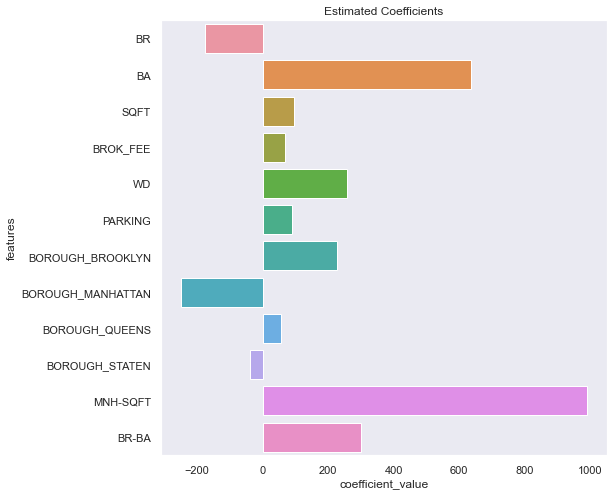

In [166]:
ax = plt.figure(figsize = (8,8))
ax = sns.barplot(x="coefficient_value", y="features", data=coefficients)
ax.set_title('Estimated Coefficients')

In [167]:
nycstudios = nyc.loc[nyc['BR'] == 0]
nycstudios['BA'].value_counts()

1.0    485
1.5      4
2.0      1
Name: BA, dtype: int64

In [168]:
nyc1bed = nyc.loc[nyc['BR'] == 1]
nyc1bed['BA'].value_counts()

1.0    1278
1.5      34
2.0      15
3.0       2
Name: BA, dtype: int64

In [169]:
nyc2bed = nyc.loc[nyc['BR'] == 2]
nyc2bed['BA'].value_counts()

1.0    1170
2.0     251
1.5      77
3.0       4
2.5       3
Name: BA, dtype: int64

In [170]:
nyc3bed = nyc.loc[nyc['BR'] == 3]
nyc3bed['BA'].value_counts()

1.0    568
2.0    265
1.5    122
3.0     25
2.5      8
3.5      1
4.0      1
Name: BA, dtype: int64

In [171]:
nyc4bed = nyc.loc[nyc['BR'] == 4]
nyc4bed['BA'].value_counts()

2.0    107
1.0     53
1.5     48
3.0     10
2.5      9
4.0      6
3.5      3
4.5      1
Name: BA, dtype: int64

In [172]:
nycbigbed = nyc.loc[nyc['BR'] > 4]
nycbigbed['BA'].value_counts()

2.0    31
1.5    11
2.5     7
3.0     5
4.5     2
1.0     2
Name: BA, dtype: int64